# Chapter 4: Image Gradients and Edge Detection

Edge detection is one of the fundamental operations when we perform image processing. It helps us reduce the amount of data (pixels) to process and maintains the structural aspect of the image. We're going to look into two commonly used edge detection schemes - the gradient (Sobel - first order derivatives) based edge detector and the Laplacian (2nd order derivative, so it is extremely sensitive to noise) based edge detector. Both of them work with convolutions and achieve the same end goal - Edge Detection.


## Sobel and Laplacian Edge detectors

In [2]:
import cv2
import os
import sys
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
 
# Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
 
# Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

In [23]:
from scipy import signal

def compute_gradients(img,laplacian,sobelX,sobelY):
    img_Laplacian = cv2.Laplacian(img,cv2.CV_64F)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(1, 3, 2).imshow(img_Laplacian,cmap=plt.cm.gray)
    plt.title("Laplacian")

    #Sobel X part
    img_SobelX =  cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(2, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(2, 3, 2)
    plt.imshow(img_SobelX,cmap=plt.cm.gray)
    plt.title("Sobel-X")

    #Sobel Y part
    img_SobelY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(3, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(3, 3, 2)
    plt.imshow(img_SobelY,cmap=plt.cm.gray)
    plt.title("Sobel-Y")

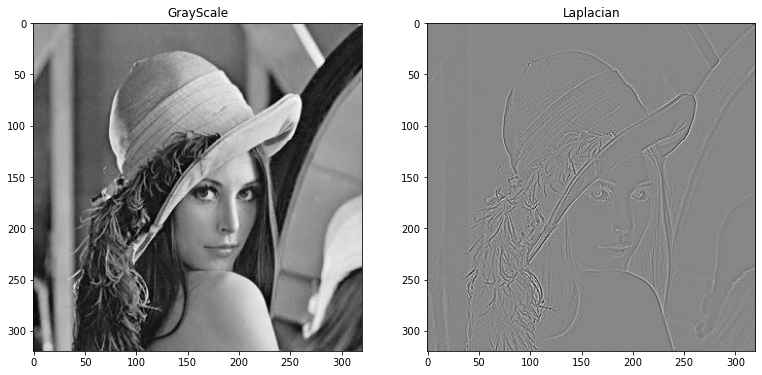

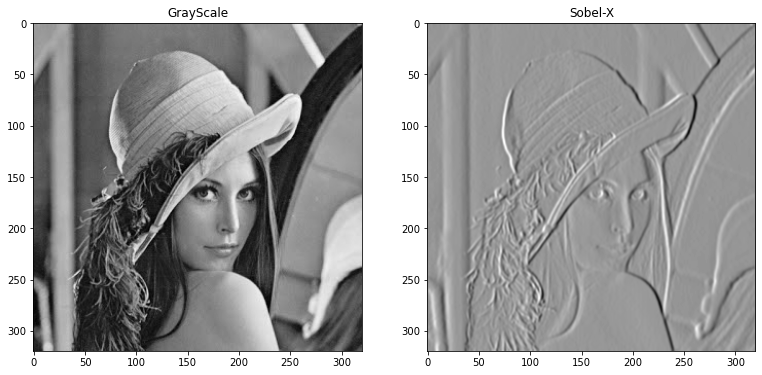

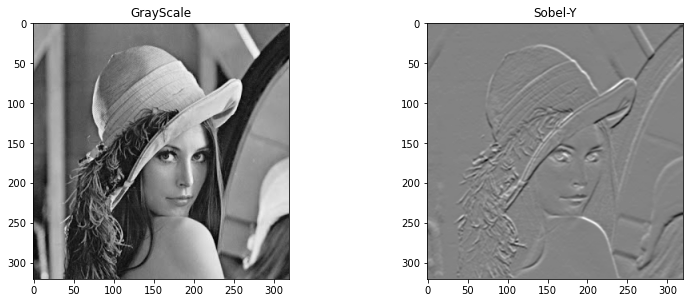

In [25]:
img = io.imread("./Images/image.jpg",1) #in skimage 1 is for grayscale
compute_gradients(img,laplacian,sobelX,sobelY)

## Canny Edge Detector
Canny Edge Detection is a popular multi-stage edge detection algorithm. Lets have a look at opencv version of an example image. 

OpenCV puts this multistage algorithm in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude.

Text(0.5, 1.0, 'Canny edge detector')

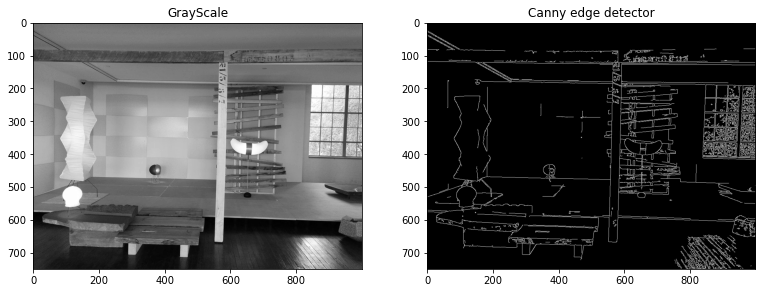

In [30]:
img = cv2.imread("Images/image1.jpg",0)
edges = cv2.Canny(img, 100, 200)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
plt.title("Canny edge detector")